In [ ]:
import os
import glob

# Define the project directory
project_dir = "/Users/tianxinshu/Documents/PhD/Courses/2510python/anxiety_data"
# Search for files matching the specified patterns
bold_file = glob.glob(
    os.path.join(project_dir, "**", "*anxiety*.nii*"),
    recursive=True
)
anatomy_file = glob.glob(
    os.path.join(project_dir, "**", "*anatomical.nii*"),
    recursive=True
)


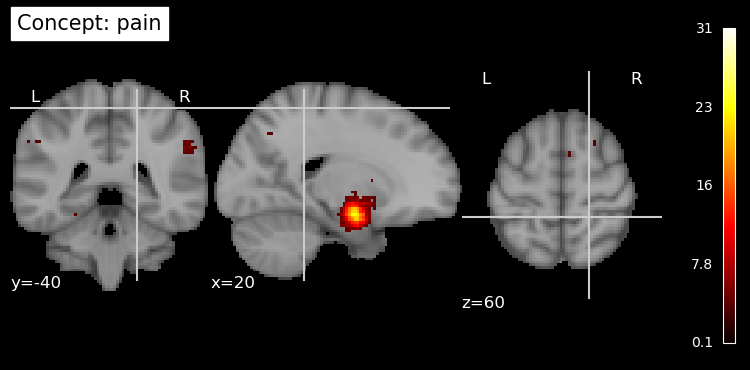

In [ ]:
from nilearn import plotting
from nilearn.image import load_img

# Plot the statistical map
plotting.plot_stat_map(
    load_img(bold_file[0]),
    bg_img=anatomy_file[0],
    title="Concept: pain",
    cmap="hot",
    threshold=0.1,
    cut_coords=(20, -40, 60), 
)

plotting.show()



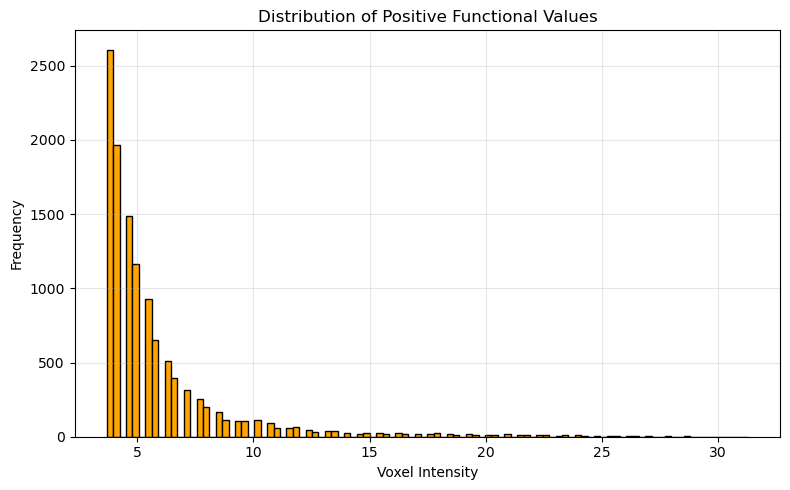

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Load functional data
# -------------------------
 
img = nib.load(bold_file[0])
data = img.get_fdata()

# -------------------------
# 2. Select positive values
# -------------------------
positive_values = data[data > 0]

# -------------------------
# 3. Plot histogram
# -------------------------
plt.figure(figsize=(8, 5))
plt.hist(positive_values, bins=100, color='orange', edgecolor='black')

# Customize
plt.title("Distribution of Positive Functional Values")
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
